Data set from https://www.physionet.org/content/eegmmidb/1.0.0/ recordings from 109 volunteers 

# **Offline preprocessing of Motor Imagery**

### **Experiment Protocol**

performed 14 experimental runs:
1. **one-minute** baseline runs with eyes open.
2. **one-minute** baseline runs with eyes closed.
3. Task 1 : **two-minute** open and close left or right fist
4. Task 2 : **two-minute** imagine opening and closing left or right fist
5. Task 3 : **two-minute** open and close both fists or both feet
6. Task 4 : **two-minute** imagine opening and closing both fists or both feet
7. Task 1
8. Task 2
9. Task 3
10. Task 4
11. Task 1
12. Task 2
13. Task 3
14. Task 4

**Annotation three codes** (T0, T1, or T2):
- T0 corresponds to rest
- T1 corresponds to onset of motion (real or imagined) of
    - the left fist (in runs 3, 4, 7, 8, 11, and 12)
    - both fists (in runs 5, 6, 9, 10, 13, and 14)
- T2 corresponds to onset of motion (real or imagined) of
    - the right fist (in runs 3, 4, 7, 8, 11, and 12)
    - both feet (in runs 5, 6, 9, 10, 13, and 14)

In [1]:
%matplotlib inline
import mne
import os
import pyedflib
import pandas as pd
import numpy as np
import seaborn as sns
from mne.io import read_raw_edf, RawArray, concatenate_raws
from mne.stats import permutation_cluster_1samp_test as pcluster_test
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

## **Import Data (Motor Imagery)**

Load data of subject1 from data path is "S001/S001R04.edf", "S001/S001R08.edf" and "S001/S001R12.edf" and check channel name of signal

In [2]:
dataset_path = "Online Dataset/eeg-motor-movementimagery-dataset-1.0.0/files"
filenames = ["S001/S001R04.edf", "S001/S001R08.edf", "S001/S001R12.edf"]
# filenames = ["S014/S014R04.edf", "S014/S014R08.edf", "S014/S014R12.edf"]
# filenames = ["S010/S010R04.edf", "S010/S010R08.edf", "S010/S010R12.edf"]
path = [os.path.join(dataset_path, filename).replace("\\", "/") for filename in filenames]

subject_raws = []
for file_path in path:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        data = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
    subject_raws.append(data)

print("Path:",path)
subject1 = concatenate_raws(subject_raws)
print("RawEDF data:", subject1)

# Print signal labels from the last file
with pyedflib.EdfReader(path[-1]) as edf_file:
    signal_labels = edf_file.getSignalLabels()
    print("signal_channels:", signal_labels)

Path: ['Online Dataset/eeg-motor-movementimagery-dataset-1.0.0/files/S001/S001R04.edf', 'Online Dataset/eeg-motor-movementimagery-dataset-1.0.0/files/S001/S001R08.edf', 'Online Dataset/eeg-motor-movementimagery-dataset-1.0.0/files/S001/S001R12.edf']
RawEDF data: <RawEDF | S001R04.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>
signal_channels: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


plot data from EEG signal in time domain

In [3]:
subject1.plot()

Using qt as 2D backend.


[[-5.0e-06 -1.2e-05 -7.7e-05 ...  0.0e+00  0.0e+00  0.0e+00]
 [ 2.0e-06 -2.4e-05 -7.8e-05 ...  0.0e+00  0.0e+00  0.0e+00]
 [ 3.7e-05  1.0e-06 -5.9e-05 ...  0.0e+00  0.0e+00  0.0e+00]
 ...
 [-4.8e-05 -4.2e-05 -4.2e-05 ...  0.0e+00  0.0e+00  0.0e+00]
 [-3.9e-05 -3.1e-05 -2.9e-05 ...  0.0e+00  0.0e+00  0.0e+00]
 [-3.9e-05 -3.4e-05 -2.7e-05 ...  0.0e+00  0.0e+00  0.0e+00]]
(64, 60000)


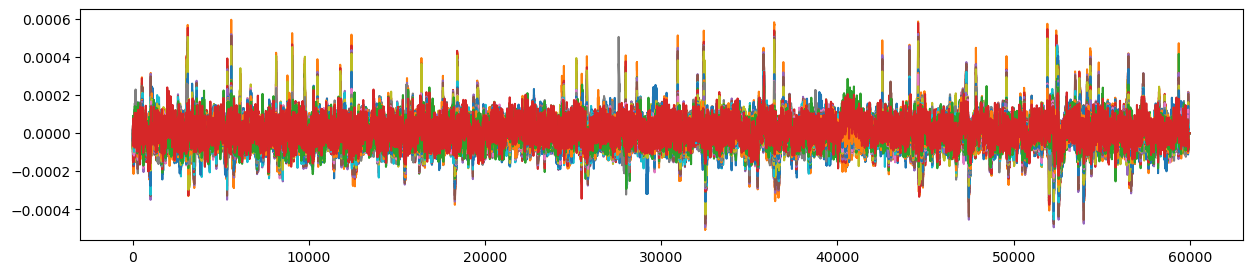

In [4]:
data = subject1.get_data()
plt.figure(figsize=(15,3))
plt.plot(data.T)
print(data)
print(data.shape)

plot data from EEG signal in frequency domain

Effective window size : 12.800 (s)


C:\Users\user\AppData\Local\Temp\ipykernel_16172\1785050501.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  subject1.compute_psd().plot();
c:\Anaconda\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


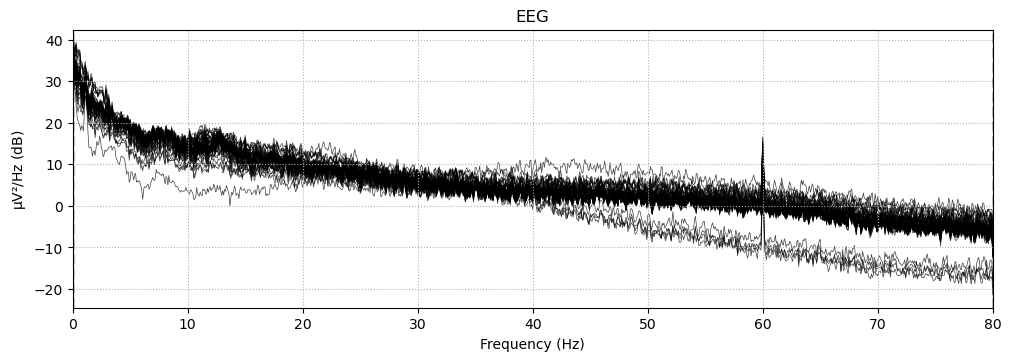

In [5]:
subject1.compute_psd().plot();

Map channel label with signal 

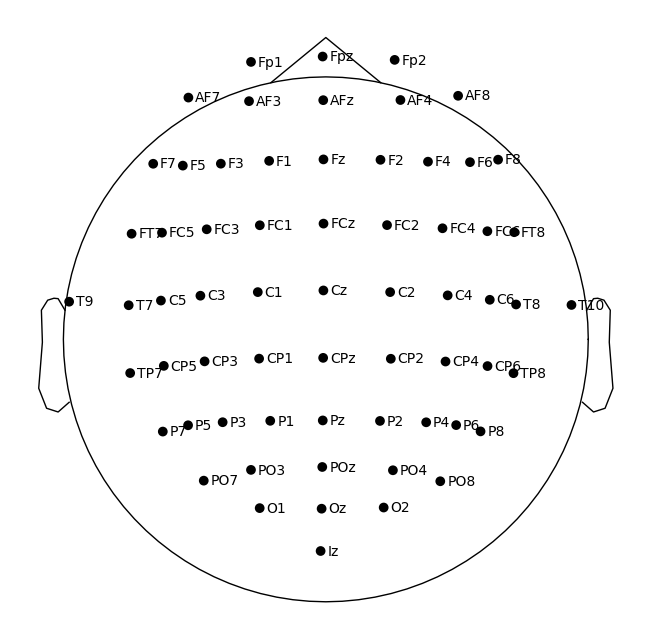

In [6]:
with open("Online Dataset/eeg-motor-movementimagery-dataset-1.0.0/files/wfdbcal", "r") as file:
    content = file.readlines()
    
chan_name = []
chan_order = []
chan_mapping = {}
order = 1

for line in content:
    parts = line.split('\t')
    channel_name = parts[0].strip()
    channel_name = channel_name.replace(".", "")
    chan_name.append(channel_name)
    order_name = "# " + str(order)
    chan_order.append(order_name)
    chan_mapping[order_name] = channel_name
    order += 1 

channel_names = [chan_mapping[f'# {i+1}'] for i in range(64)]
old_ch_names = subject1.info['ch_names']

subject1.rename_channels({old: new for old, new in zip(old_ch_names, channel_names)})

# Set montage
# montage = mne.channels.make_standard_montage('standard_1020')
subject1.set_montage(montage = mne.channels.make_standard_montage('standard_1020'))

# Plot channel locations
subject1.plot_sensors(show_names=True);

plot topographic maps

Effective window size : 12.800 (s)


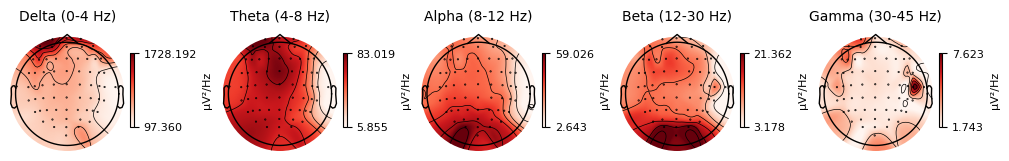

In [7]:
subject1.compute_psd().plot_topomap();

## **Re-referencing**

Original data of brain signal (64 channels)

Effective window size : 12.800 (s)


c:\Anaconda\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


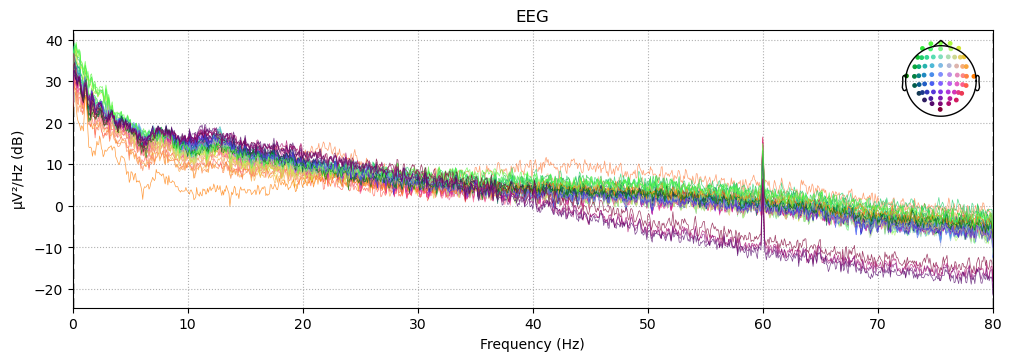

In [8]:
subject1.compute_psd().plot();

**Common Average Reference (CAR)** for re-referancing signal 64 channels

In [9]:
streams = subject1.copy().set_eeg_reference('average', projection=True)
streams.apply_proj()

EEG channel type selected for re-referencing
Adding average EEG reference projection.


1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<RawEDF | S001R04.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>

Once re-referencing is done, it's apparent that there are channels moving closer to other graphs, as seen clearly. For instance, the purple graph overlaps and closely aligns with other graphs significantly.

Effective window size : 12.800 (s)


c:\Anaconda\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


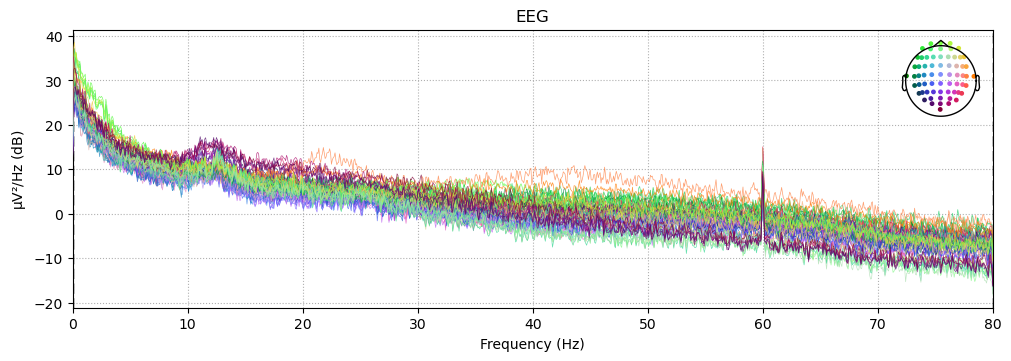

In [10]:
streams.compute_psd().plot();

## **Filtering**

**Infinite Impulse Response (IIR)** for filtering signal
- Butterworth Filters and 6 order
- Low frequency = 0.0
- High frequency = 50.0

In [11]:
stream_filter = streams.copy().filter(l_freq=0.0, h_freq=40.0, method = 'iir', iir_params= {"order": 6, "ftype":'butter'})

Filtering raw data in 3 contiguous segments
Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB



Effective window size : 12.800 (s)


c:\Anaconda\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


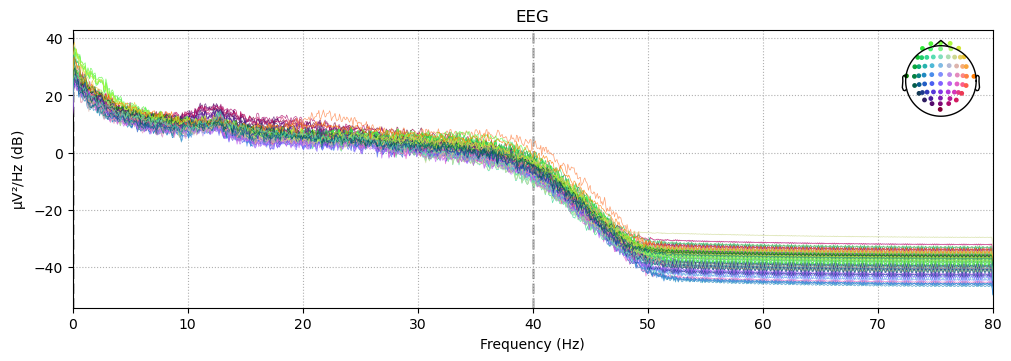

In [12]:
stream_filter.compute_psd().plot();

In [13]:
stream_filter.plot();

## **Artifact rejection and correction**

**Independent Component Analysis (ICA)** for remove artifact from eye blink or other artifact 

In [14]:
ica = mne.preprocessing.ICA(n_components=63, random_state=97, max_iter=800)

In [15]:
ica.fit(stream_filter.copy())

Fitting ICA to data using 64 channels (please be patient, this may take a while)
    Applying projection operator with 1 vector (pre-whitener computation)
    Applying projection operator with 1 vector (pre-whitener application)
Selecting by number: 63 components


C:\Users\user\AppData\Local\Temp\ipykernel_16172\3213032925.py:1: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(stream_filter.copy())


    Applying projection operator with 1 vector (pre-whitener application)
Fitting ICA took 4.3s.


<ICA | raw data decomposition, method: fastica (fit in 76 iterations on 60000 samples), 63 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>

plot topographies of the ICA components to observe and identify which components are likely to be artifacts, in order to use them for removing those specific components, for the purpose of artifact removal

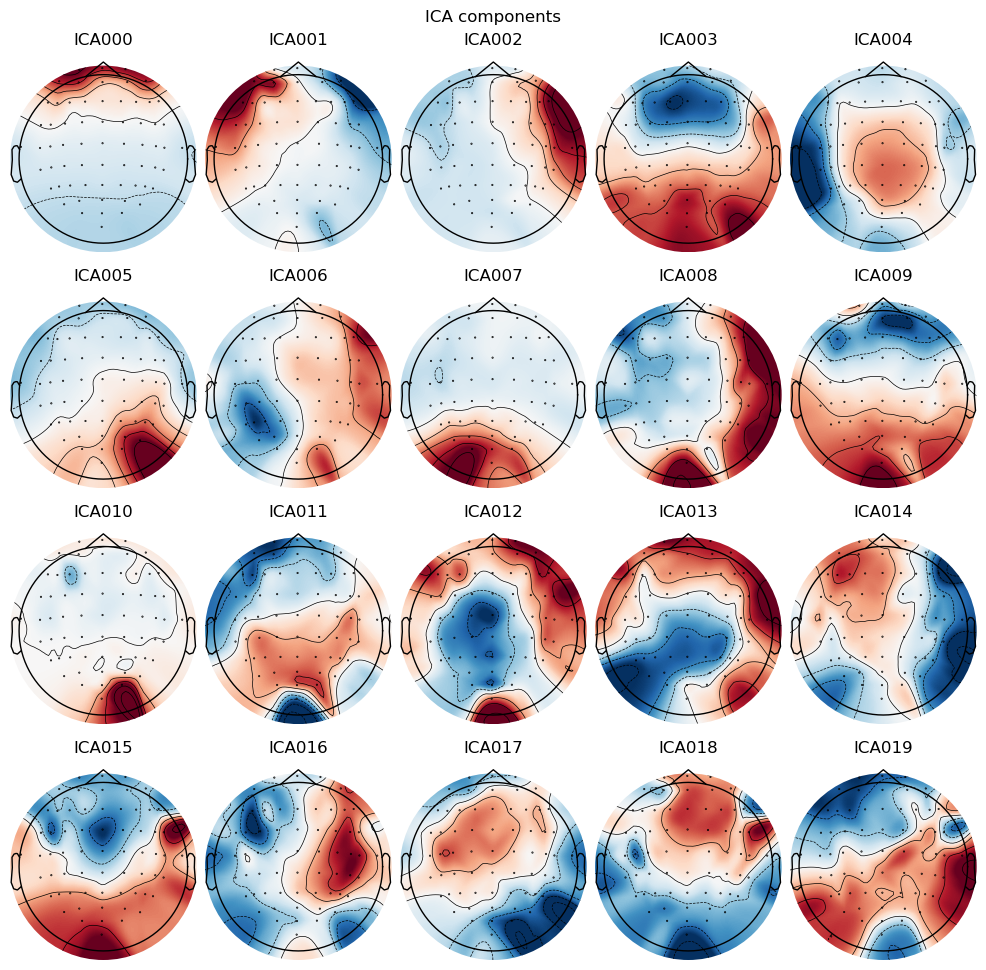

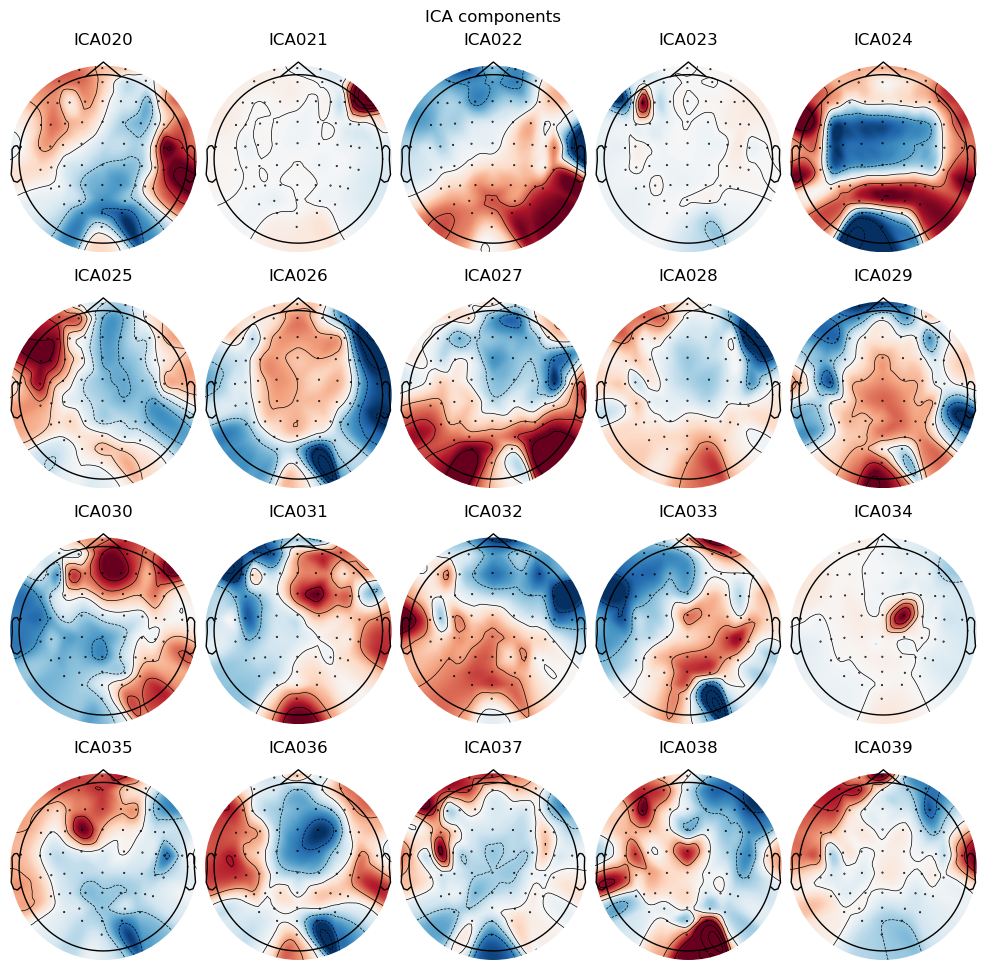

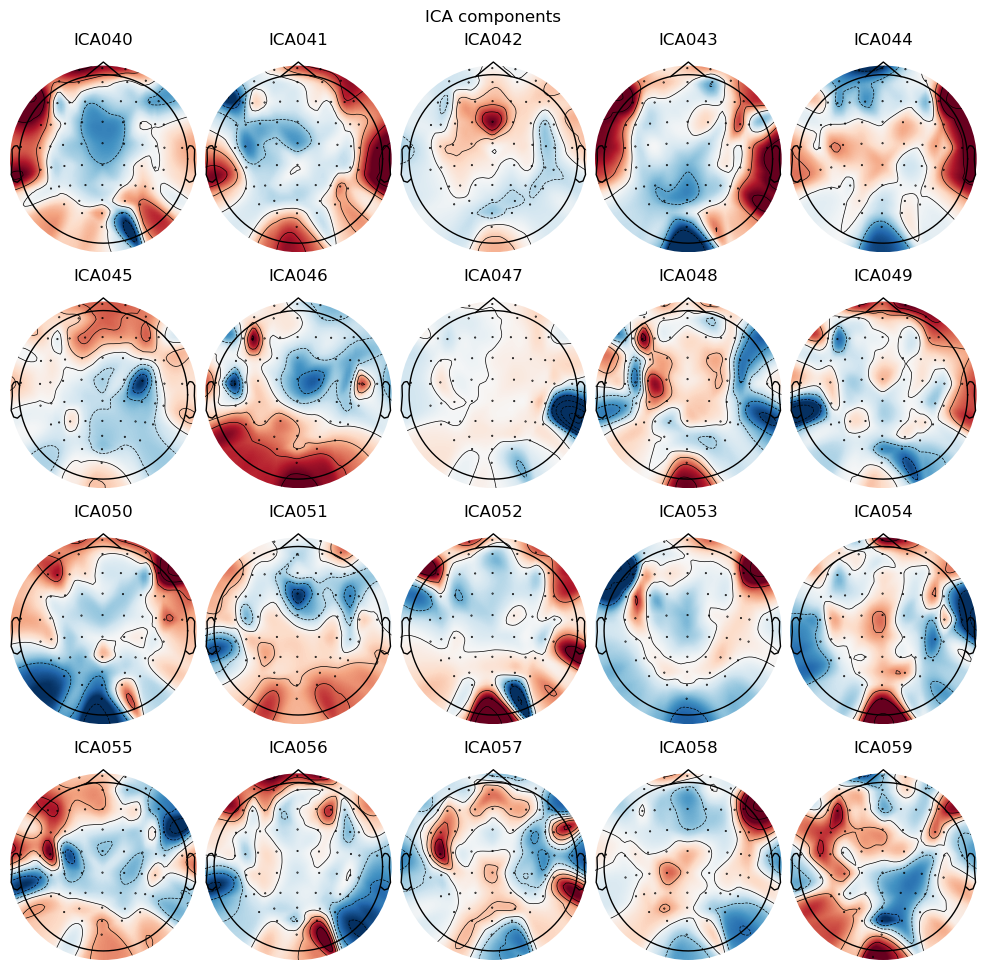

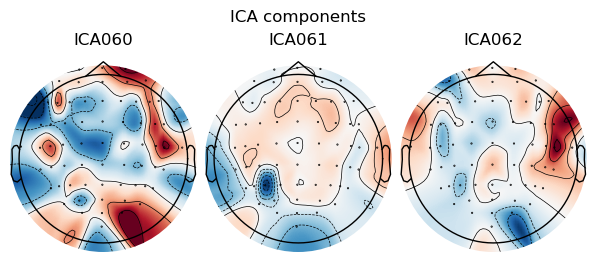

In [16]:
ica.plot_components();

Find bad component or artifact component by visual inspection and remove it from the data

In [17]:
bad_idx, scores = ica.find_bads_eog(stream_filter.copy(), ch_name='T9', threshold=1.6)
print(bad_idx)

Using EOG channel: T9
    Applying projection operator with 1 vector (pre-whitener application)


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 sam

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[4, 5, 43, 11, 0, 16, 1, 36, 49, 18, 26, 40, 30]


Check bad component from signal in time domain to verify the accuracy of signals eligible to be artifacts.

In [18]:
ica.plot_sources(stream_filter.copy());

    Applying projection operator with 1 vector (pre-whitener application)


Creating RawArray with float64 data, n_channels=63, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   374.994 secs
Ready.


In [19]:
ica.exclude = [4, 5, 43, 11, 0, 16, 1, 36, 49, 18, 26, 40, 30]

In [20]:
stream_filter.plot();

Remove the bad ICA components from the data

In [21]:
stream_ica = ica.apply(stream_filter.copy(),exclude=ica.exclude)
stream_ica.plot();

Applying ICA to Raw instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (63 components)
    Zeroing out 13 ICA components
    Projecting back using 64 PCA components


In [22]:
ica.plot_sources(stream_filter.copy());

    Applying projection operator with 1 vector (pre-whitener application)


Creating RawArray with float64 data, n_channels=63, n_times=60000
    Range : 0 ... 59999 =      0.000 ...   374.994 secs
Ready.


## **Epoch segmentation**

### **Event marker**

Each event from signal
- T0 = rest
- T1 = Left hand motor imagery
- T2 = Right hand motor imagery

In [23]:
events, event_dict = mne.events_from_annotations(stream_filter)
print(event_dict)

Used Annotations descriptions: ['T0', 'T1', 'T2']
{'T0': 1, 'T1': 2, 'T2': 3}


Frequency of events

In [24]:
print(stream_filter.info["sfreq"])

160.0


Plot event markers : x-axis is time in seconds and y-axis is the event id

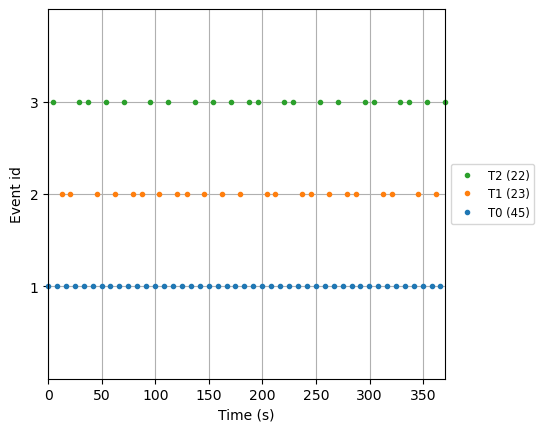

C:\Users\user\AppData\Local\Temp\ipykernel_16172\234485562.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [25]:
fig = mne.viz.plot_events(
    events, sfreq=stream_filter.info["sfreq"], first_samp=stream_filter.first_samp, event_id= event_dict
)
ax = fig.axes[0]
x_lim_seconds = [10, 20]
ax.set_xlim(x_lim_seconds)
fig.show()

### **Epochs**

Epochs segmentation for segment signal around event

In [26]:
# Epoch data based on a subset of interested events
event_selected = {'rest': 1, 'left': 2, 'right': 3}

stream_epochs = mne.Epochs(stream_ica.copy().filter(l_freq=0.0, h_freq=40.0, method = 'iir', iir_params= {"order": 6, "ftype":'butter'}), events, tmin = -2.0, tmax = 6.0, 
                    event_id = event_selected, preload= True, verbose=False, event_repeated='drop')

Filtering raw data in 3 contiguous segments
Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB



In [27]:
stream_epochs

<Epochs |  84 events (all good), -2 – 6 s, baseline -2 – 0 s, ~52.6 MB, data loaded,
 'rest': 42
 'left': 21
 'right': 21>

In [28]:
stream_epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: Average EEG reference: on
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>

plot image of the epochs of each channel and each target(event)

Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated


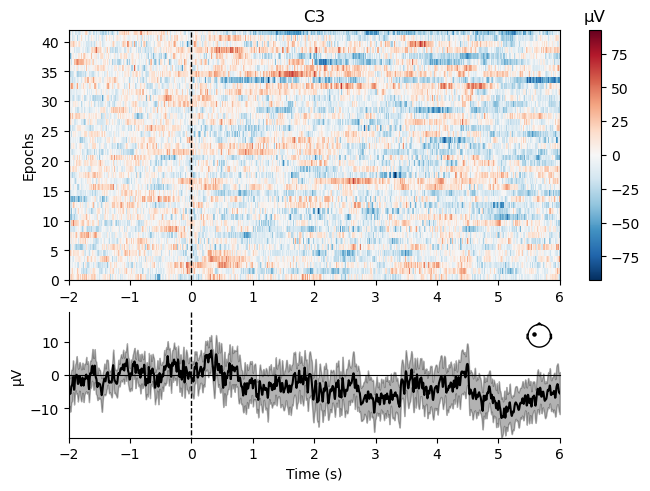

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated


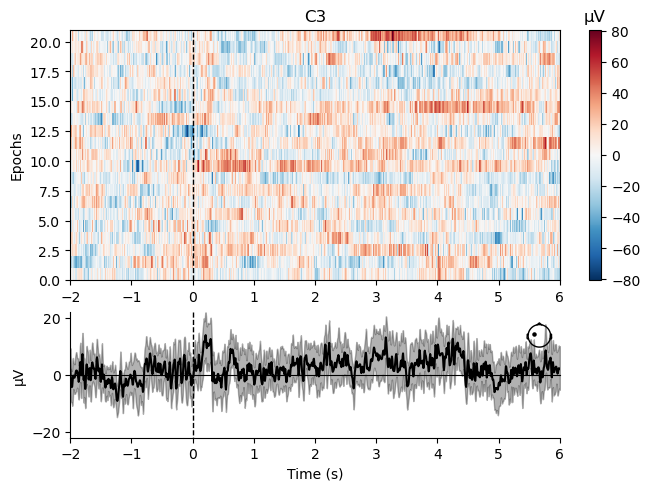

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated


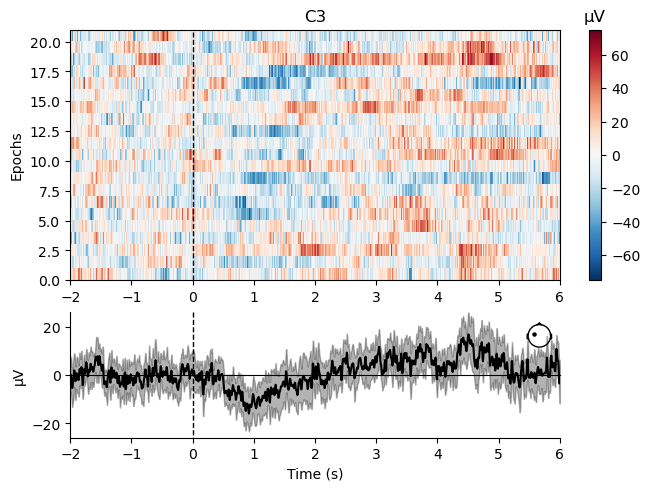

In [29]:
stream_epochs["rest"].plot_image(picks = "C3");
stream_epochs["left"].plot_image(picks = "C3");
stream_epochs["right"].plot_image(picks = "C3");

Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated


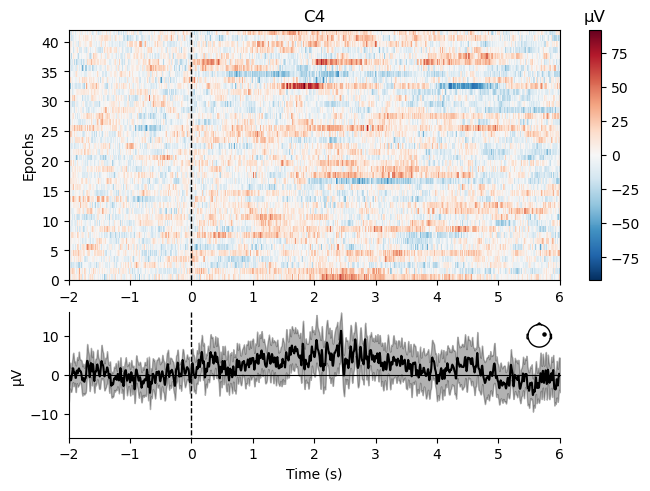

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated


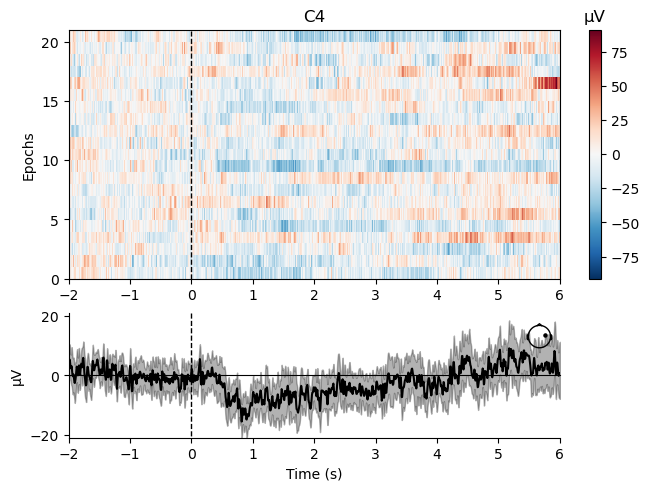

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated


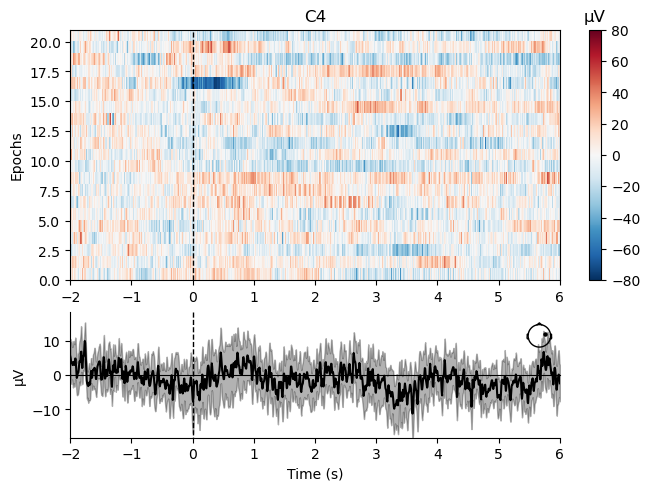

In [30]:
stream_epochs["rest"].plot_image(picks = "C4");
stream_epochs["left"].plot_image(picks = "C4");
stream_epochs["right"].plot_image(picks = "C4");

Not setting metadata
42 matching events found
No baseline correction applied
0 projection items activated


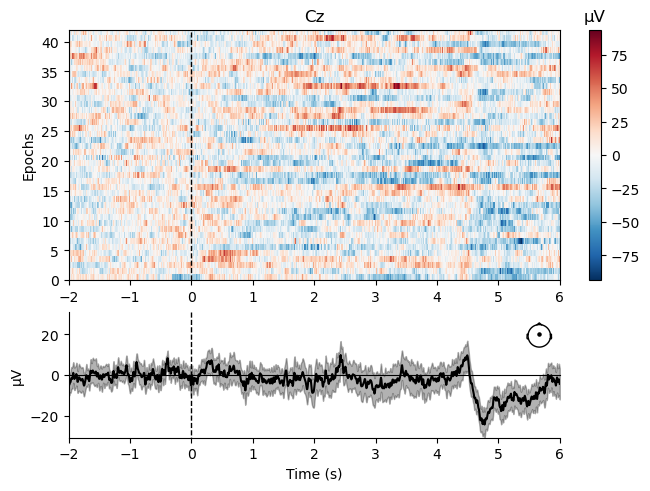

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated


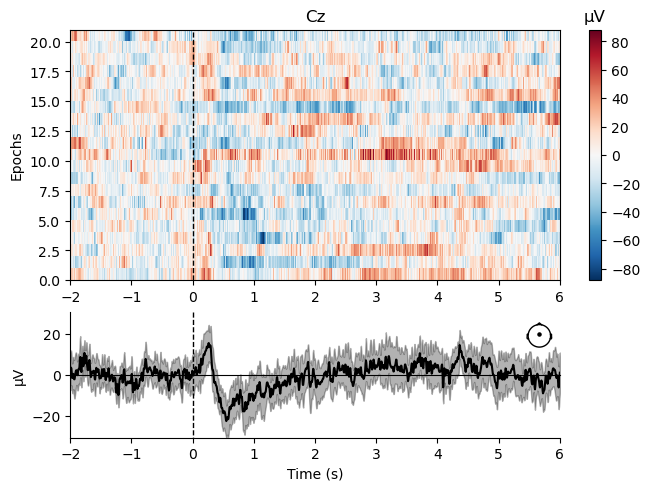

Not setting metadata
21 matching events found
No baseline correction applied
0 projection items activated


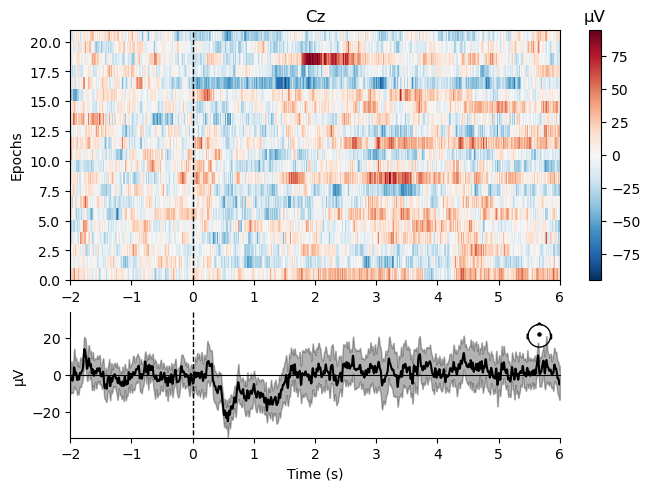

In [31]:
stream_epochs["rest"].plot_image(picks = "Cz");
stream_epochs["left"].plot_image(picks = "Cz");
stream_epochs["right"].plot_image(picks = "Cz");

In [32]:
stream_epochs.to_data_frame()

time condition  epoch        FC5        FC3        FC1        FCz  \
0      -2.00000     right      1  -9.591948  -1.238136  -5.820632  -5.501327   
1      -1.99375     right      1 -12.043488  -2.952036  -8.500266  -7.926878   
2      -1.98750     right      1 -15.755004  -1.110606  -1.199123  -0.786320   
3      -1.98125     right      1 -20.755094   0.988978   9.261493  13.711024   
4      -1.97500     right      1 -24.297624   1.180167  15.099284  26.437982   
...         ...       ...    ...        ...        ...        ...        ...   
107599  5.97500      rest     88  17.304606  15.118696  18.847667  18.334573   
107600  5.98125      rest     88  17.093123  13.750531  14.328911  10.866130   
107601  5.98750      rest     88  14.686015   7.680703   6.817101   2.948634   
107602  5.99375      rest     88  10.505589   3.093278   2.829525   0.888581   
107603  6.00000      rest     88   6.834602   5.274689   5.309398   5.346987   

              FC2        FC4        FC6  ...         P8        PO7        PO3  \
0      -10.337149  -0.340900   2.962120  ...   5.468581  33.019237  26.192804   
1      -12.001477  -5.516390  -6.015690  ...  13.423260  27.406178  24.328728   
2       -7.967077  -4.233357 -11.317514  ...  12.082351  19.028520  18.917378   
3        1.372782   4.190366  -8.083909  ...   1.506812  16.629507  16.501048   
4       11.883016  13.347102   1.218600  ...  -9.460041  19.046821  17.272204   
...           ...        ...        ...  ...        ...        ...        ...   
107599  21.937037  25.699010  36.241839  ... -16.530800 -15.761035  -9.759705   
107600  15.800854  25.280407  39.961100  ... -12.266564 -20.943288 -14.860207   
107601  10.248718  22.566909  41.699270  ...  -5.385631 -24.371388 -18.564187   
107602   8.774803  19.163401  40.622907  ...  -2.324094 -27.292704 -22.602964   
107603  11.448855  18.900124  40.259336  ...  -5.245655 -29.234087 -25.829400   

              POz        PO4        PO8         O1         Oz         O2  \
0       23.493850   8.297493  10.645320  33.481957  18.113495  28.110665   
1       20.359190  11.741742  15.823315  24.483573  11.158299  27.042483   
2       14.274079   7.900359  10.792790  10.897129  -1.068560  19.306124   
3       13.063532   0.721926  -0.476019   3.891298  -9.927822  11.350722   
4       15.299654  -5.874087 -11.459310   8.468770 -10.863101   8.910653   
...           ...        ...        ...        ...        ...        ...   
107599 -10.220485 -11.339303  -8.858232  -7.506454 -15.988527   7.295525   
107600 -11.308781  -8.352073  -6.041387 -11.731543 -16.075785  14.115815   
107601 -12.987286  -3.834464  -2.649210 -19.033902 -19.703908  14.564521   
107602 -17.637518  -3.730352  -2.983288 -25.495377 -24.070277  10.449684   
107603 -26.029871 -11.461582  -9.803656 -29.974084 -31.317875   1.487507   

               Iz  
0       14.803479  
1        5.932096  
2        2.840269  
3        2.436598  
4       -3.335264  
...           ...  
107599  12.175638  
107600  15.844290  
107601  12.663082  
107602  11.661179  
107603  11.158400  

[107604 rows x 67 columns]

Select some channel that relate with Motor Imagery (C3, Cz, C4) but select channel nearby C3, Cz and C4 as well ('C5','C3','C1','Cz','C2','C4','C6')

In [33]:
# Selected data from only the channels we are interested in
chans_selected = ['C5','C3','C1','Cz','C2','C4','C6']
stream_epochs = stream_epochs.pick_channels(chans_selected)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [34]:
stream_epochs.plot();

    Using multitaper spectrum estimation with 7 DPSS windows


Averaging across epochs...


c:\Anaconda\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


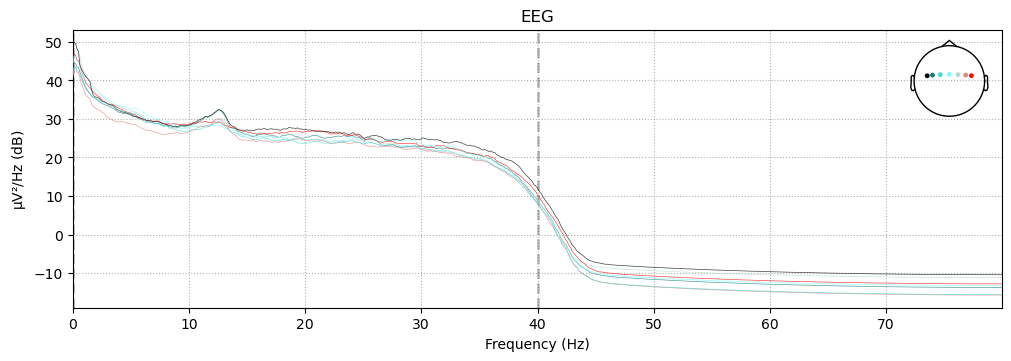

In [35]:
stream_epochs.compute_psd().plot();

## **Baseline Correction**

In [36]:
filt = stream_epochs.copy().filter(l_freq=0.0, h_freq=20.0, method = 'iir', iir_params= {"order": 6, "ftype":'butter'})
filt.plot();

Setting up low-pass filter at 20 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoff at 20.00 Hz: -6.02 dB



In [37]:
stream_baseline = filt.copy().apply_baseline((-0.5, 0))
stream_baseline.plot();

Applying baseline correction (mode: mean)


## **Analysis ERD and ERS for MI**

Segmentation signal (epoch) from analysis ERD and ERS to observe whether the collected signals from volunteers can be utilized and to discern the differences between Left Hand Motor Imagery and Right Hand Motor Imagery. 

Effective window size : 12.800 (s)


c:\Anaconda\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


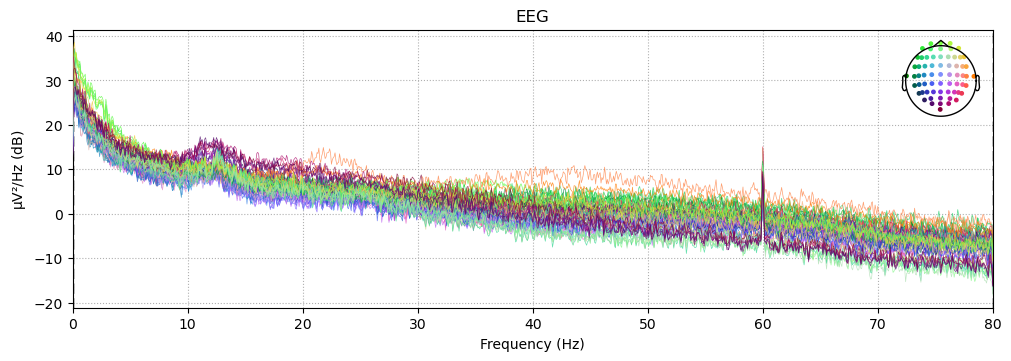

In [38]:
streams.compute_psd().plot();

In [39]:
ERD_ERS = subject1.copy()
ERD_ERS.annotations.rename(dict(T0="rest", T1="left", T2="right"))

tmin, tmax = -2.0, 8.0
event_selected = {'rest': 1, 'left': 2, 'right': 3}  # map event IDs to tasks
event_ids = dict(rest=1 ,left=2, right=3)

epochs_ERD_ERS = mne.Epochs(
    ERD_ERS,
    events,
    event_id=event_selected,
    tmin = -2.0, tmax = 6.0,
    picks=("C3", "Cz", "C4"),
    baseline=None,
    preload=True, verbose=False, event_repeated='drop'
)

In [40]:
epochs_ERD_ERS.plot();

In [41]:
freqs = np.arange(2, 36)  # frequencies from 2-35Hz
vmin, vmax = -1, 1.5  # set min and max ERDS values in plot
baseline = (-1, 0)  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


Not setting metadata
Applying baseline correction (mode: percent)
Using a threshold of 1.682878
stat_fun(H1): min=-11.368006 max=4.378435
Running initial clustering …
Found 102 clusters


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
C:\Users\user\AppData\Local\Temp\ipykernel_16172\1154884502.py:13: RuntimeWarning: tmax is not in time interval. tmax is set to <class 'mne.time_frequency.tfr.EpochsTFR'>.tmax (6 s)
  tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.682878
stat_fun(H1): min=-11.368006 max=4.378435
Running initial clustering …
Found 54 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.682878
stat_fun(H1): min=-7.407628 max=4.470814
Running initial clustering …
Found 107 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.682878
stat_fun(H1): min=-7.407628 max=4.470814
Running initial clustering …
Found 46 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.682878
stat_fun(H1): min=-8.792027 max=4.612345
Running initial clustering …
Found 115 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 2 additional clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #3 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.682878
stat_fun(H1): min=-8.792027 max=4.612345
Running initial clustering …
Found 49 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


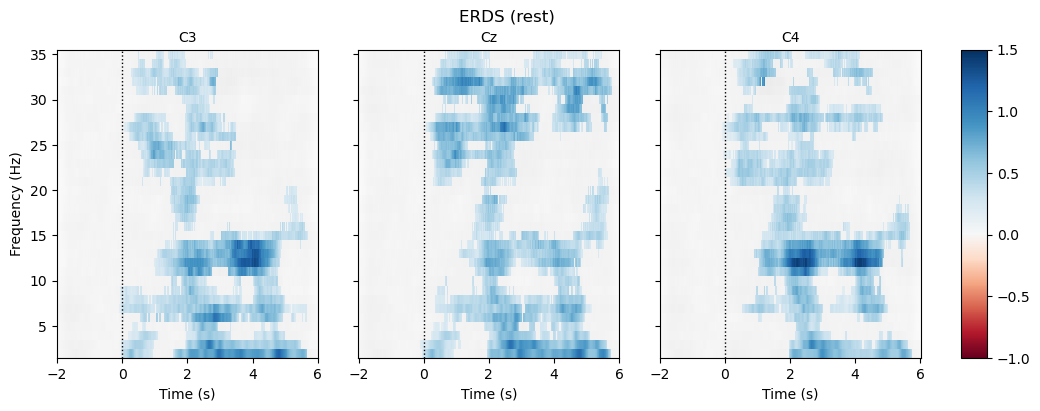

Using a threshold of 1.724718
stat_fun(H1): min=-10.506441 max=4.106042
Running initial clustering …
Found 119 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Using a threshold of -1.724718
stat_fun(H1): min=-10.506441 max=4.106042
Running initial clustering …
Found 83 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-8.097628 max=3.870380
Running initial clustering …
Found 120 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.724718
stat_fun(H1): min=-8.097628 max=3.870380
Running initial clustering …
Found 65 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-8.360994 max=4.208056
Running initial clustering …
Found 81 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.724718
stat_fun(H1): min=-8.360994 max=4.208056
Running initial clustering …
Found 82 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


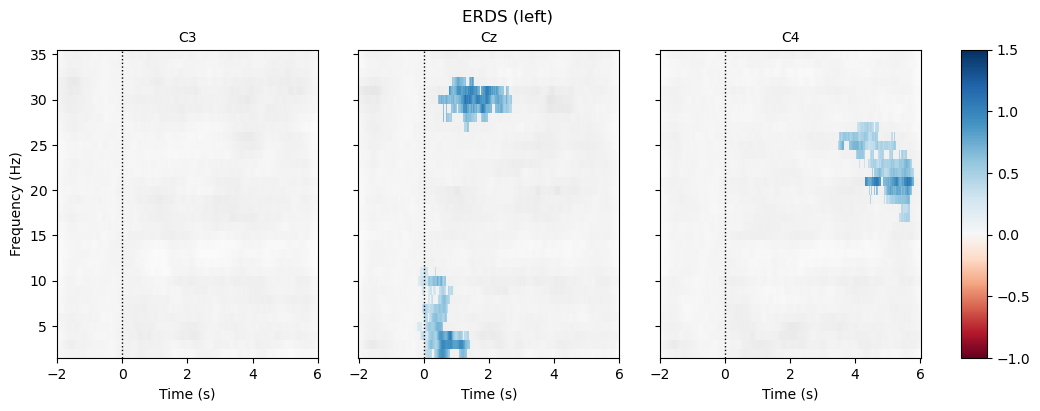

Using a threshold of 1.724718
stat_fun(H1): min=-9.864564 max=3.609207
Running initial clustering …
Found 107 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.724718
stat_fun(H1): min=-9.864564 max=3.609207
Running initial clustering …
Found 85 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-10.274722 max=4.213333
Running initial clustering …
Found 170 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.724718
stat_fun(H1): min=-10.274722 max=4.213333
Running initial clustering …
Found 77 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-9.125178 max=3.593632
Running initial clustering …
Found 101 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Using a threshold of -1.724718
stat_fun(H1): min=-9.125178 max=3.593632
Running initial clustering …
Found 71 clusters


  0%|          | Permuting : 0/99 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
No baseline correction applied


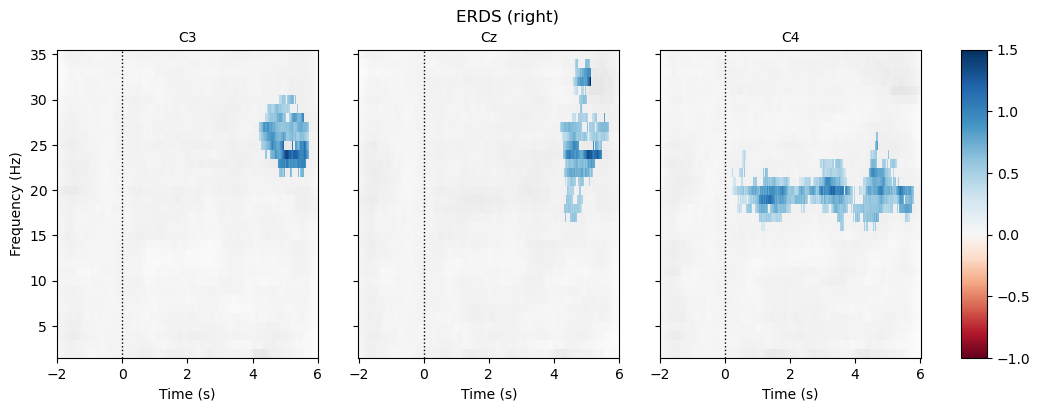

In [42]:
from mne.time_frequency import tfr_multitaper

tfr = tfr_multitaper(
    # method="multitaper",
    inst=epochs_ERD_ERS,
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
)
tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

for event in event_ids:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(
        1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
    )
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch], tail=1, **kwargs)
        # negative clusters
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch], tail=-1, **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot(
            [ch],
            cmap="RdBu",
            cnorm=cnorm,
            axes=ax,
            colorbar=False,
            show=False,
            mask=mask,
            mask_style="mask",
        )

        ax.set_title(epochs_ERD_ERS.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS ({event})")
    plt.show()


From the graph, it can be observed that during rest, Event-Related Synchronization (ERS) occurs throughout the graph, including in C3, Cz, and C4. However, in the Left Hand Motor Imagery (MI) event, ERS is noticeable at CZ and C4. Specifically, in C4, it occurs at the 5-second mark and within the frequency range of 15 - 30 Hz, which aligns with the typical alpha (8-13 Hz) or beta (13-30 Hz) ranges often analyzed in MI studies. This suggests that the signal generated stems from left hand motor imagery. Conversely, in Right Hand MI, ERS is observed in C3, CZ, and C4. In C3, it occurs at the 5-second mark and within the frequency range of 20 - 30 Hz, while in C4, it is present from 0 to 6 seconds. This implies that the signal generated is likely from right hand motor imagery.

In [43]:
df = tfr.to_data_frame(time_format=None)
df.head()

time  freq  epoch condition        C3        Cz        C4
0 -2.0000   2.0      1     right -0.917519 -0.958123 -0.983238
1 -1.9875   2.0      1     right -0.912334 -0.957735 -0.982780
2 -1.9750   2.0      1     right -0.905922 -0.956666 -0.981920
3 -1.9625   2.0      1     right -0.901877 -0.955353 -0.980109
4 -1.9500   2.0      1     right -0.900107 -0.953387 -0.976673

## **Evoked**

In [44]:
filter_st = stream_baseline.copy().filter(l_freq=0.0, h_freq=15.0, method = 'iir', iir_params= {"order": 7, "ftype":'butter'})

chans_selected = ['C5','C3','C1','Cz','C2','C4','C6']
epochs = filter_st.pick_channels(chans_selected)

Setting up low-pass filter at 15 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 14 (effective, after forward-backward)
- Cutoff at 15.00 Hz: -6.02 dB

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [45]:
rest_epochs = epochs["rest"].average()
rest_epochs

<Evoked | 'rest' (average, N=42), -2 – 6 s, baseline -0.5 – 0 s, 7 ch, ~115 kB>

In [46]:
left_epochs = epochs["left"].average()
left_epochs

<Evoked | 'left' (average, N=21), -2 – 6 s, baseline -0.5 – 0 s, 7 ch, ~115 kB>

In [47]:
right_epochs = epochs["right"].average()
right_epochs

<Evoked | 'right' (average, N=21), -2 – 6 s, baseline -0.5 – 0 s, 7 ch, ~115 kB>

In [48]:
epochs.get_data().shape

C:\Users\user\AppData\Local\Temp\ipykernel_16172\2796709754.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data().shape


(84, 7, 1281)

To create plots of signals within different events by averaging each event across all channels ('C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6') to observe the differences in signals occurring in each event and each channel.

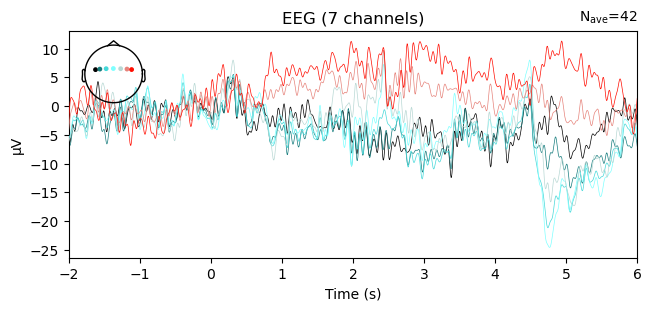

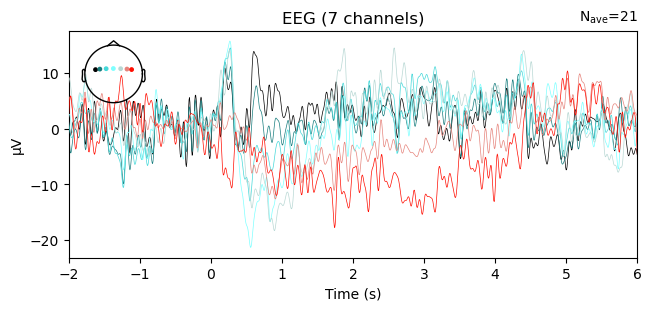

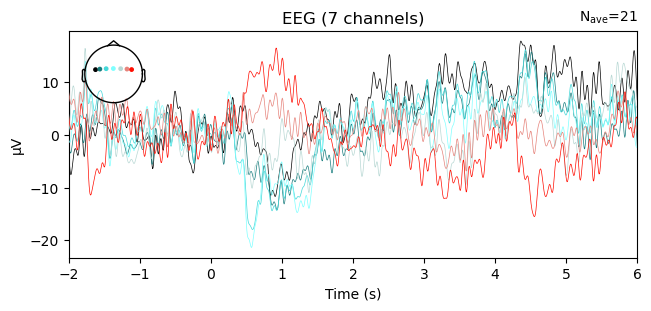

In [49]:
rest_epochs.plot();
left_epochs.plot();
right_epochs.plot();

Plot topographie in duration 0, 1, 2, 3, 4, 5 and 6 second

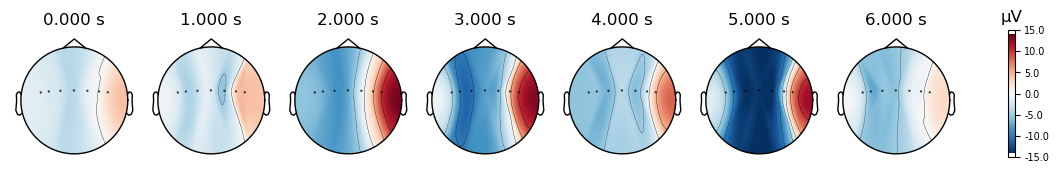

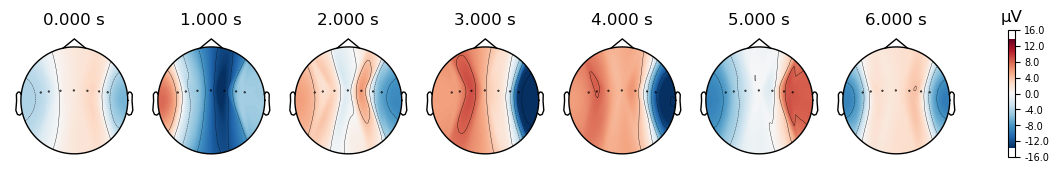

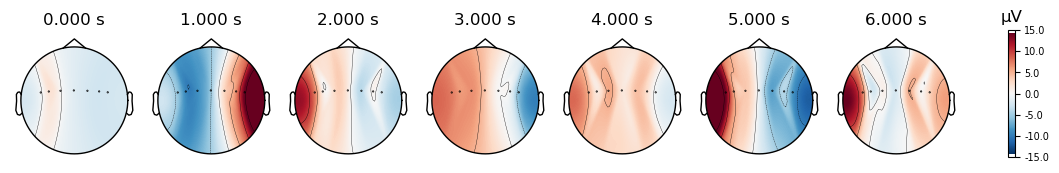

In [50]:
rest_epochs.plot_topomap(times=[0, 1, 2, 3, 4, 5, 6]);
left_epochs.plot_topomap(times=[0, 1, 2, 3, 4, 5, 6]);
right_epochs.plot_topomap(times=[0, 1, 2, 3, 4, 5, 6]);

Combined between graph and topographie

Projections have already been applied. Setting proj attribute to True.


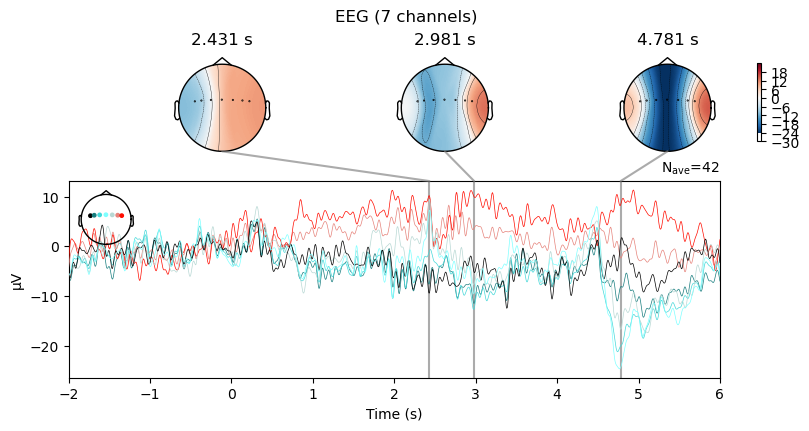

Projections have already been applied. Setting proj attribute to True.


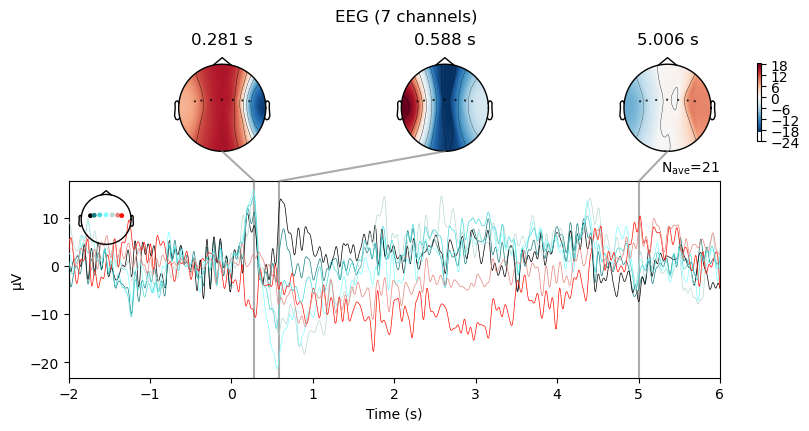

Projections have already been applied. Setting proj attribute to True.


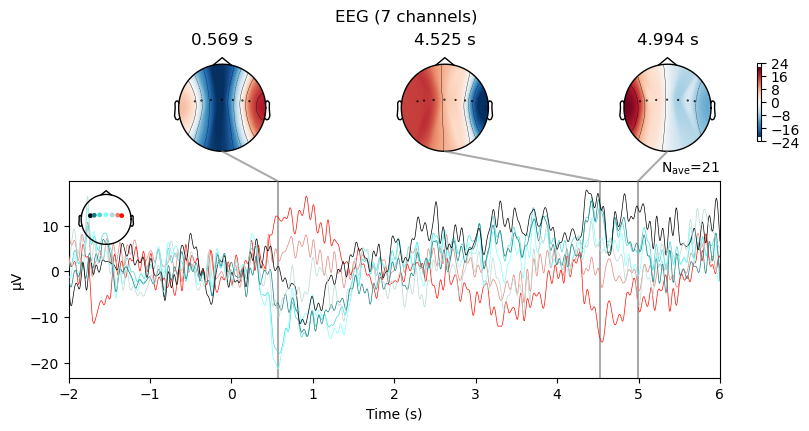

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


In [62]:
rest_epochs.plot_joint(times=[2.431, 2.981, 4.781]);
left_epochs.plot_joint(times=[0.281, 0.588, 5.006]);
right_epochs.plot_joint(times=[0.569, 4.525, 4.994]);

From the graph, it can be observed that around the 5-second mark, during the Left Hand Motor Imagery (MI), there is brain signal stimulation occurring in the right hemisphere, indicated by the presence of red in that area. Conversely, during the Right Hand MI, brain signal stimulation occurs in the left hemisphere, as indicated by the red coloration in that region.

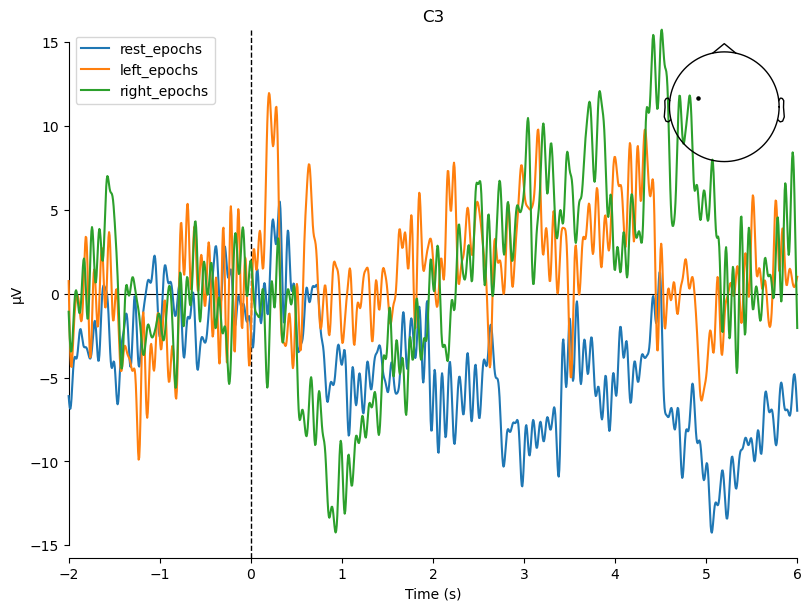

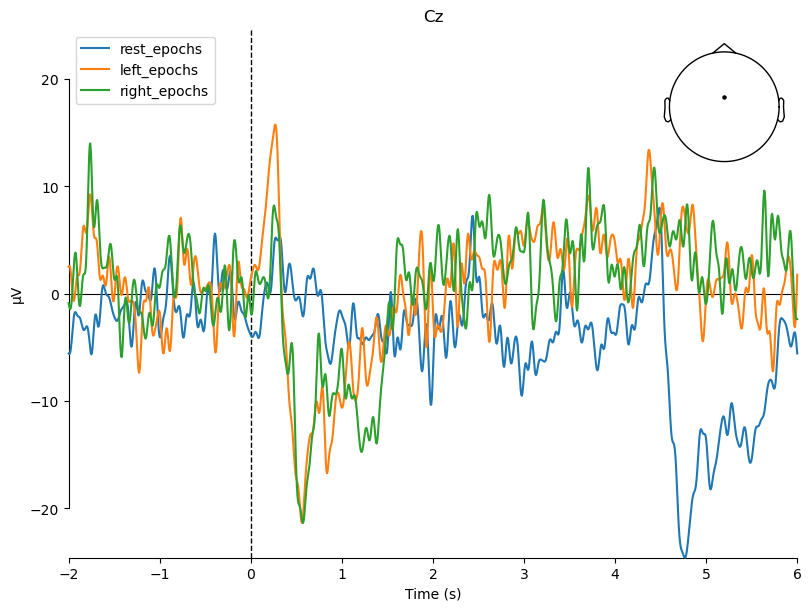

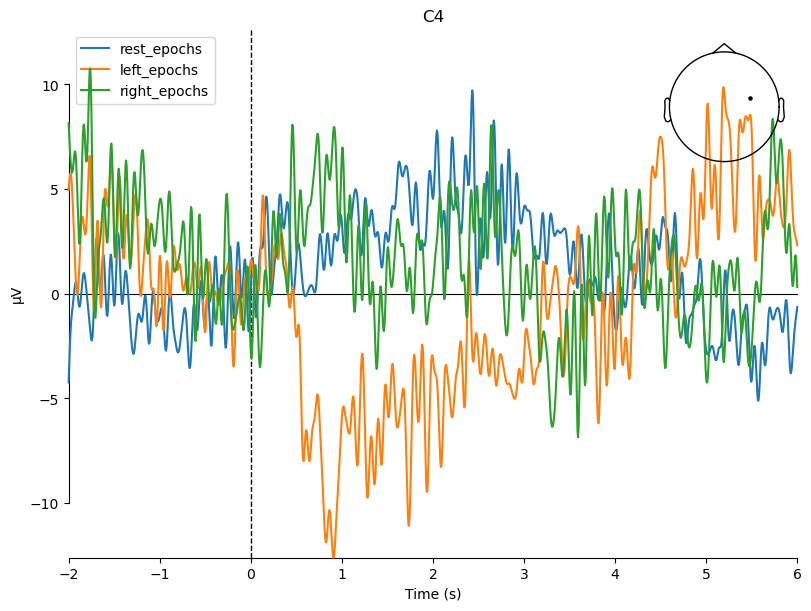

In [52]:
mne.viz.plot_compare_evokeds(
    {"rest_epochs" :rest_epochs,"left_epochs" :left_epochs,"right_epochs" : right_epochs},
    picks="C3",
);
mne.viz.plot_compare_evokeds(
    {"rest_epochs" :rest_epochs,"left_epochs" :left_epochs,"right_epochs" : right_epochs},
    picks="Cz",
);
mne.viz.plot_compare_evokeds(
    {"rest_epochs" :rest_epochs,"left_epochs" :left_epochs,"right_epochs" : right_epochs},
    picks="C4",
);

## **Time-frequency domain analysis**

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Anaconda\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


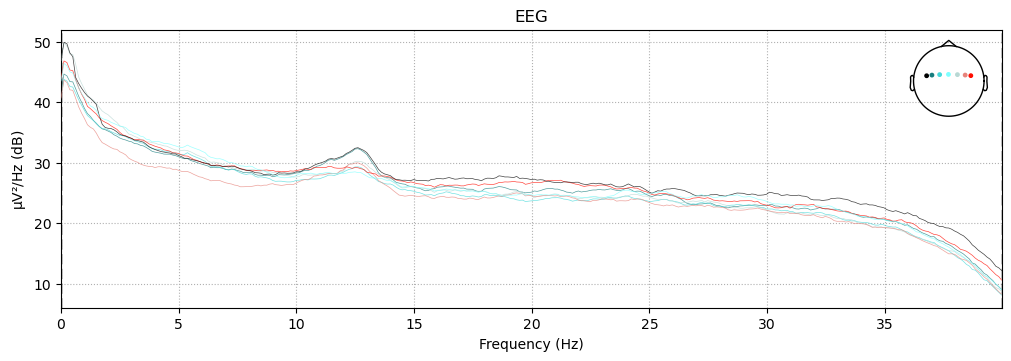

In [53]:
epochs_for_tfr = stream_epochs
epochs_for_tfr.plot_psd(fmin=0, fmax=40);

In [54]:
from mne.time_frequency import tfr_morlet

In [55]:
freqs = list(range(1, 36))  # frequencies from 2-35Hz
tfr_rest = tfr_morlet(epochs_for_tfr["rest"], freqs=freqs, n_cycles=3, return_itc=False)
tfr_left = tfr_morlet(epochs_for_tfr["left"], freqs=freqs, n_cycles=3, return_itc=False)
tfr_right = tfr_morlet(epochs_for_tfr["right"], freqs=freqs, n_cycles=3, return_itc=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with

In [56]:
tfr_contrast = mne.combine_evoked([tfr_rest, tfr_left, tfr_right], weights=[1, -1, 1])
tfr_contrast.apply_baseline((-0.5, 0))

Applying baseline correction (mode: mean)


<AverageTFR | time : [-2.000000, 6.000000], freq : [1.000000, 35.000000], nave : 8, channels : 7, ~2.4 MB>

No baseline correction applied
No baseline correction applied


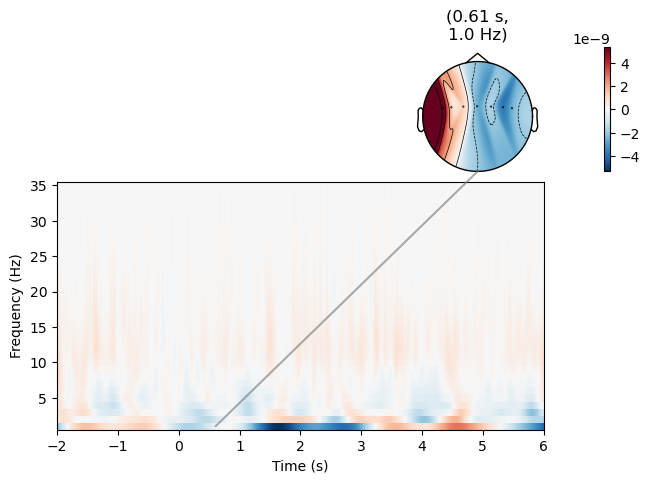

In [57]:
tfr_contrast.plot_joint();

No baseline correction applied


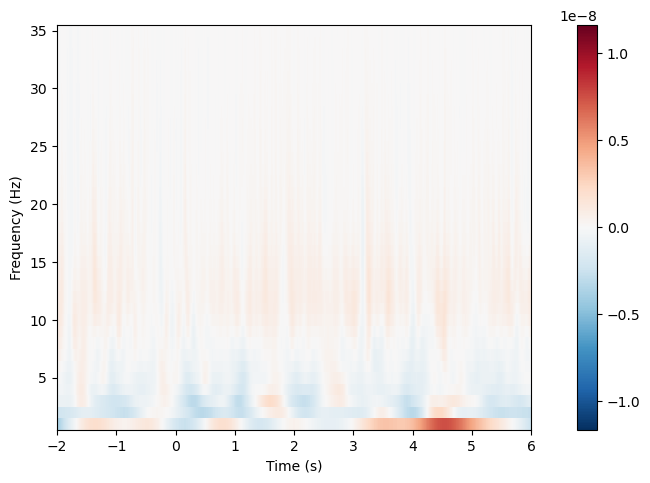

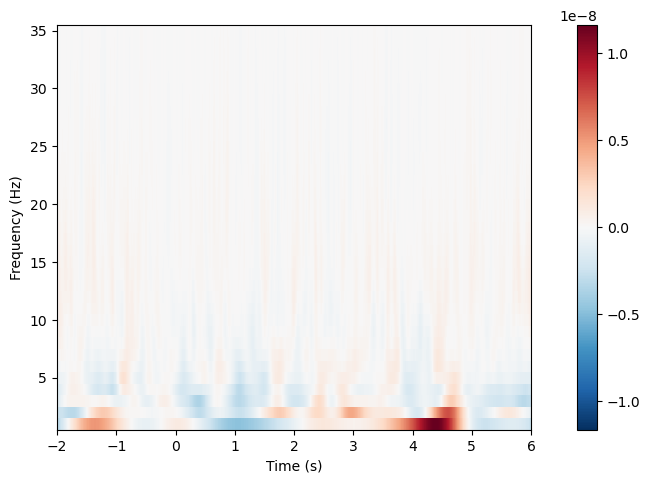

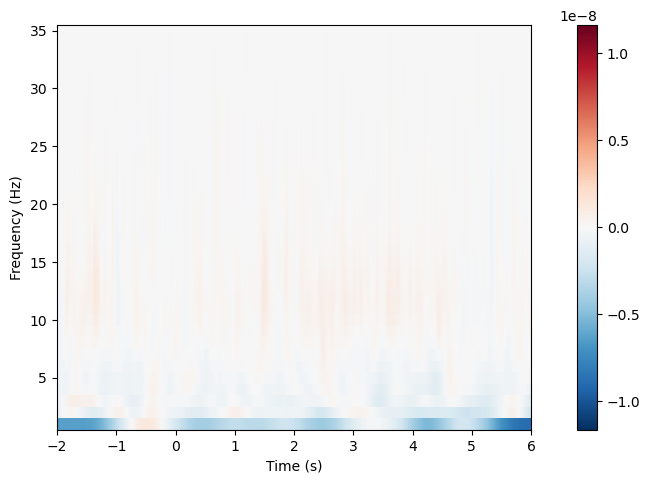

In [58]:
tfr_contrast.plot(picks = ["C3", "Cz", "C4"]);